In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.integrate import trapezoid, solve_ivp

In [4]:
#Dados da questão
r = 30*1e-2
N1 = 1000
U0 = 4*np.pi*1e-7

num_pontos = 200

Massa = 10  # massa de 10Kg

#caso real
CampoMagnetico = np.array([0, 68, 135, 203, 271, 338, 406, 474, 542, 609, 1100, 1500, 2500, 4000, 5000, 9000, 12000, 20000, 25000])
DensidadeCampo = np.array([0, 0.733, 1.205, 1.424, 1.517, 1.560, 1.588, 1.617, 1.631, 1.646, 1.689, 1.703,1.724, 1.731, 1.738, 1.761, 1.770, 1.800, 1.816])

#caso linear
CampoMagnetico_linear = np.array([0, 68])
DensidadeCampo_linear = np.array([0, 0.733])


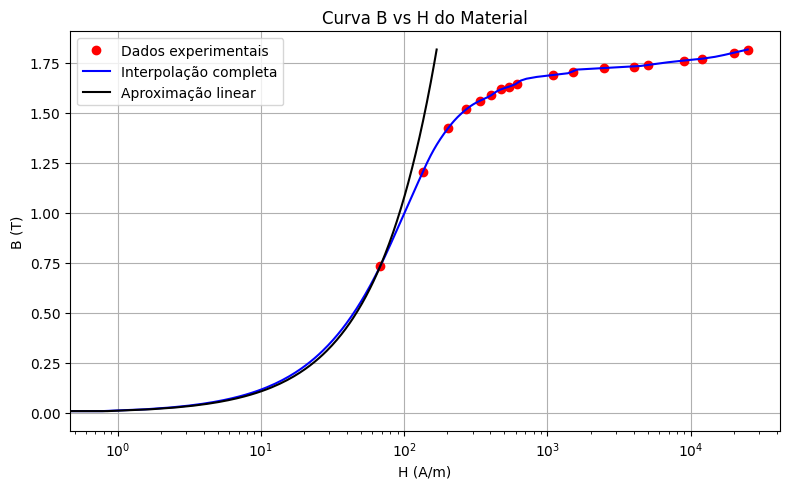

In [12]:
# Interpolação cúbica (ordem crescente de B)
f_real = CubicSpline(DensidadeCampo, CampoMagnetico, bc_type='natural')
f_linear = CubicSpline(DensidadeCampo_linear, CampoMagnetico_linear, bc_type='natural')

# Geração de pontos para interpolação
B_a = np.linspace(min(DensidadeCampo), max(DensidadeCampo), num_pontos)
H_a = f_real(B_a)
H_linear_a = f_linear(B_a)

# Plotagem
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(CampoMagnetico, DensidadeCampo, 'ro', label='Dados experimentais')
ax.plot(H_a, B_a, 'b-', label='Interpolação completa')
ax.plot(H_linear_a, B_a, 'k-', label='Aproximação linear')

ax.set_title('Curva B vs H do Material')
ax.set_xlabel('H (A/m)')
ax.set_ylabel('B (T)')
ax.set_xscale('log')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

- Determine X de modo que área útil para passagem de fluxo magnético nas paredes mais externas
seja a mesma que na coluna central.

In [ ]:
'''
Área1 = π * 0.30²
Área2 = (π * X²) - π*(X-0.10)²
Área1 = Área2 =π * 0.30² = (π * X²) - π*(X-0.10)²
assim obtemos que :
X = 0.50
'''

X = 50*1e-2

- Considerando uma corrente aplicada na bobina de 1 A, apresente um gráfico para a força
magnética que surge no sistema em função do comprimento do entreferro nas condições a
seguir:

In [ ]:
def Coenergia_forca(Interpolacao_H_B, Nf):
    # variação de x
    x = np.linspace(0, 0.02, num_pontos)# 20 mm em metros

    # variação de Bm
    Bm = np.linspace(0, 25000, num_pontos)
    # Corrente ficticia -> Inicia um vetor com todos os valores nulos
    If = np.zeros(num_pontos)
    # Fluxo concatenado
    fluxo_concatenado = np.zeros(num_pontos)
    Coenergia = np.zeros(num_pontos)

    for j in range(len(x)):
      for b in range(len(Bm)):

        # If = (Hi*d + Bm*[x + g0]/U0) /Nf
        If[b] = ((Interpolacao_H_B(Bm[b])*d) + ((Bm[b]*(x[j]+g0)/U0)))/Nf

        # λ =  Nf * Bm * Area_do_imã
        fluxo_concatenado[b] =  Nf*Bm[b]*Area

        if (f"{x[j]:.4f}" == "0.0005"):  # Posição do elemento móvel
            # Encontrando os valores da densidade de fluxo B para a corrente If
            Bm_x = np.copy(Bm)
            If_x = np.copy(If)

      # Interpolação de λ , Bm, If
      interpolacao_fluxo_concatenado_If = CubicSpline(If,fluxo_concatenado)
      interpolacao_If_Bm = CubicSpline(Bm,If)

      #parte inferior da integral, ponto onde B = 0
      If_0 = interpolacao_If_Bm(0)
      #limite de integração do λ
      lim_int_fluxo_concatenado = np.linspace(If_0, 0, num_pontos)
      #valores para coenergia
      interpol_fluxo_concatenado = interpolacao_fluxo_concatenado_If(lim_int_fluxo_concatenado)
      #valores para coenergia
      Coenergia[j] = trapezoid(interpol_fluxo_concatenado,lim_int_fluxo_concatenado) 
      
      Bop_normal = 1.08
      Hop_normal = -31.14*1e+3
      xop_normal = 0.5*1e-3
      #valor da corrente quando está em operação normal
      Iop_normal =   ((-Hop_normal*d) + Bop_normal*((xop_normal + g0)/U0))/Nf
      
      Iint_Nf_1000 = np.linspace(If_0,Iop_normal,num_pontos)
      Fluxo_concat_Interpolado_Nf_1000 = interpolacao_fluxo_concatenado_If(Iint_Nf_1000)
      CoenergiaN1000[j] = trapezoid(Fluxo_concat_Interpolado_Nf_1000,Iint_Nf_1000)

    #caso de operação normal  
    if(Nf == 1000):
      Forca = np.gradient(CoenergiaN1000[:len(x)-1], x[:len(x)-1])
      return Forca, CoenergiaN1000[:len(CoenergiaN1000)-1],(x[:len(x)-1]), Bm_x, If_x, Iop_normal 

    #caso da bobina ficticia
    else:
      Forca = np.gradient(Coenergia[:len(x)-1], x[:len(x)-1])
      return Forca, Coenergia[:len(Coenergia)-1],(x[:len(x)-1])